# Maschinelles Lernen (ML) - Übung 3
# Perzeptronen und mehrschichtige Perzeptronen
## 3.1 Das einfache Perzeptron als linearer Klassifikator

In dieser Übung wird ein einfaches Perzeptron (engl. perceptron) programmiert, trainiert und als linearer Klassifikator eingesetzt.

![perceptron.pdf](Handout/fig/perceptron/perceptron.png)

Weitere Informationen zur Wirkweise des einfachen Perzeptrons sind im PDF-Handout für diese Übung zu finden.

**Aufgabe 1:** In dieser Übung sollen Sie ein Perzeptron objektorientiert erstellen. Dazu ist bereits eine vorstrukturierte Klasse *Perceptron* mit den Methoden *_init_* zur Initialisierung des Perzeptrons (z.B. Gewichte, Lernrate), *predict* zur Klassifizierung eines Datenpunktes und *fit* zum Trainieren des Perzeptrons vorbereitet.		Vervollständigen Sie diese Methoden.

In [1]:
# matplotlib: Modul zum Plotten von Daten
from matplotlib import pyplot as plt 
# numpy: Mathematikbibliothek
import numpy as np 
import pandas as pd

#### Hilfen für die Klasse Perzeptron

##### Allgemein
Verwendete Variblenbezeichnungen:
- inputs $\hat{=} \textrm{ } \lbrace x_1, \ldots x_n \rbrace$; Sollte als Numpy Array definiert werden.
- eta $\hat{=} \textrm{ } \eta$

##### Methode _init_(self, number_of_inputs, epochs, learning_rate):
In Python entspricht \_\_init\_\_ dem Konstruktor. Die \_\_init\_\_() Methode initialisiert die Klasse Perceptron. Definiere und initialisiere hier die folgenden Variablen: 
- die zu lernenden Gewichte $\textbf{w}$,
- die maximale Anzahl der Epochen (Lernzyklen), die der Lernalgorithmus durchlaufen darf und
- die Lernrate, die den Grad der Veränderung der Gewichte bei jedem Schritt durch die Trainingsdaten bestimmt.

##### Methode predict(self, inputs):
Die predict(...) Methode enthält die Aktivierungsfunktion h(z) (hier: die Signum-Funktion):

\begin{equation}
 h(z) =
 \begin{cases}
			-1 \textrm{ falls } z < 0 \textrm{,} \\	
			0 \textrm{ falls } z = 0 \textrm{,} \\	
			1 \textrm{ falls } z > 0 \textrm{.} \\
		\end{cases}
\end{equation}                  
Die Eingabe der Methode (inputs) sollte als NumPy Array/Vektor definiert werden.

##### Methode fit(self, training_inputs, labels):
Die Methode fit(...) benötigt zwei Argumente:
- training_inputs ist eine Liste von numpy-Vektoren und
- labels ist ein Array von erwarteten Ausgabewerten.
        
Beim Trainieren des Perzeptrons soll folgende Funktionalität implementiert werden: 
Ein einzelner Trainingsdatenpunkt wird betrachtet und eine Vorhersage (Methode predict) getroffen. Auf Basis der Vorhersage $\hat{y}$ werden die Gewichte nach folgender Regel aktualisiert (siehe auch Handout):
\begin{equation}
\textbf{w} \leftarrow \textbf{w} + \eta \cdot \left( y - \hat{y} \right) \cdot \textbf{x} \textrm{.} 
\end{equation}

Der Block aus predict und update der Gewichte wird solange iterativ ausgeführt bis die maximale Anzahl der Epochen erreicht ist (oder optional bis die Fehlerfunktion konvergiert ist).  


In [2]:
class Perceptron(object):
    def __init__(self, number_of_inputs, epochs, eta):
        """
        Beispielaufruf des Konstruktors:
        >>> Perceptron(2, 100, 0.1)
        """
        ### Dein Code kommt hierhin:
        self.weights = np.ones(number_of_inputs+1)
        self.epochs = epochs
        self.eta = eta
        self.bias = 1
        ##########################
        pass
           
    def predict(self, inputs):
        """
        Beispiel des Funktionsaufrufes:
        >>> inputs = np.array([0, 1])
        >>> h = perceptron.predict(inputs) 
        """
        # Dein Code kommt hierhin:
        #bias
        sum = self.bias * self.weights[0]
        for i in range(len(inputs)):
            sum += self.weights[i+1]*inputs[i]
        return np.sign(sum)
        ########################## 
        pass

    def fit(self, training_inputs, labels):
        """
        Beispiel des Funktionsaufrufs:
        >>> perceptron.fit(train_input, labels)
        """
        # Dein Code kommt hierhin:
        for i in range(len(training_inputs)):
            for j in range(len(training_inputs[i])+1):
                #bias
                if j == 0:
                    self.weights[j] = self.eta * (labels[i] - self.predict(training_inputs[i])) * self.bias
                self.weights[j] += self.eta * (labels[i] - self.predict(training_inputs[i])) * training_inputs[i,j-1]
        ##########################
        pass
            
    def status(self):
        """
        Die Methode status(...) gibt die aktuellen Gewichte aus.

        Beispiel des Funktionsaufrufes und der Ausgabe:
        >>> perceptron.status()
        Perceptron weights:  [0. 1. 1.]
        """
        print("Perceptron weights: ", self.weights)
        
    def getWeights(self):
        return self.weights

**Aufgabe 2:** Wenden Sie das implementierte Perzeptron auf das `AND`, `OR` und `XOR` Problem im zweidimensionalen Raum an. Berechnen Sie anhand der gelernten Gewichte $\mathbf{w}$ des Perzeptrons die Geradengleichung der Diskriminanzgeraden und plotten Sie diese zusammen mit den Datenpunkten des jeweiligen Problems.

[0.  0.8 0.8]


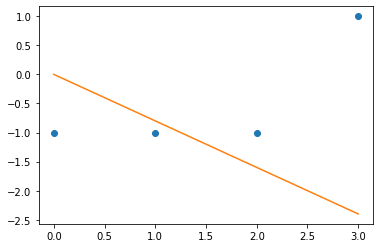

In [10]:
# Beispiel mit AND
train_input_AND = np.array([
                        [0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]
                        ])

labels_AND = np.array([-1, -1, -1, 1])

# Dein Code kommt hier hin:
# Perceptron anlegen und trainieren
perceptron_AND = Perceptron(len(train_input_AND[0]),100,0.1)
perceptron_AND.fit(train_input_AND,labels_AND)

# Geradengleichung berechnen und plotten
weights = perceptron_AND.getWeights()
print(weights)
x = list()
disc = list()
for i in range(len(train_input_AND)):
    x.append(train_input_AND[i].dot(2**np.arange(train_input_AND[i].size)[::-1]))
    sum = weights[0]
    for j in range(len(train_input_AND[i])):
        sum -= 2**j * train_input_AND[i,-j-1] * weights[j+1]
    disc.append(sum)
plt.plot(x,labels_AND,'o')
plt.plot(x,disc)


[0. 1. 1.]


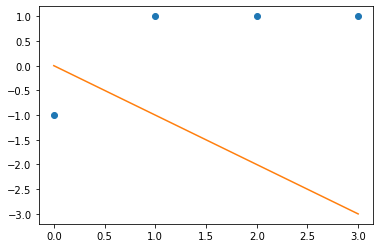

In [11]:
# Beispiel mit OR
train_input_OR = np.array([
                        [0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]
                        ])

labels_OR = np.array([-1, 1, 1, 1])

# Dein Code kommt hier hin:
# Perceptron anlegen und trainieren
perceptron_OR = Perceptron(len(train_input_OR[0]),100,0.1)
perceptron_OR.fit(train_input_OR,labels_OR)

# Geradengleichung berechnen und plotten
weights = perceptron_OR.getWeights()
print(weights)
x = list()
disc = list()
for i in range(len(train_input_OR)):
    x.append(train_input_OR[i].dot(2**np.arange(train_input_OR[i].size)[::-1]))
    sum = weights[0]
    for j in range(len(train_input_OR[i])):
        sum -= 2**j * train_input_OR[i,-j-1] * weights[j+1]
    disc.append(sum)
plt.plot(x,labels_OR,'o')
plt.plot(x,disc)

[-0.4  0.8  0.8]


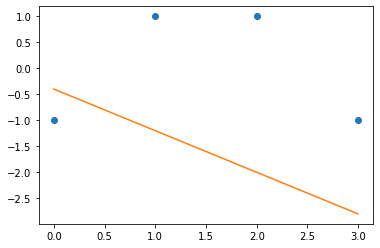

In [13]:
# Beispiel mit XOR
train_input_XOR = np.array([
                        [0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]
                        ])

labels_XOR = np.array([-1, 1, 1, -1])

# Dein Code kommt hier hin:
# Perceptron anlegen und trainieren
perceptron_XOR = Perceptron(len(train_input_XOR[0]),100,0.1)
perceptron_XOR.fit(train_input_XOR,labels_XOR)

# Geradengleichung berechnen und plotten
weights = perceptron_XOR.getWeights()
print(weights)
x = list()
disc = list()
for i in range(len(train_input_XOR)):
    x.append(train_input_XOR[i].dot(2**np.arange(train_input_XOR[i].size)[::-1]))
    sum = weights[0]
    for j in range(len(train_input_XOR[i])):
        sum -= 2**j * train_input_XOR[i,-j-1] * weights[j+1]
    disc.append(sum)
plt.plot(x,labels_XOR,'o')
plt.plot(x,disc)

**Aufgabe 3:** Warum wird im Perzeptron der Bias $x_0$ benötigt beziehungsweise wieso werden bei $n$ Merkmalen ($x_1, \ldots, x_n$), $n+1$ Gewichte ($w_0, \ldots, w_n$) benötigt? 

Antwort:

**Aufgabe 4:** Wenden Sie das Perzeptron auf das Problem der Banknotenklassifizierung der letzten Übung an. Wählen und berechnen Sie dafür wieder zwei geeignete Merkmale der Trainingsbanknoten (Momentenberechnung auf den Farbkanälen mit  `banknotes[i].compute_feature(moment, color)`). Mit welcher Genauigkeit (engl. *accuracy*) werden die Testbanknoten klassifiziert? Wie sind die erreichten Ergebnisse des Perzeptrons im Vergleich zum linearen Klassifikator der letzten Übung zu bewerten?

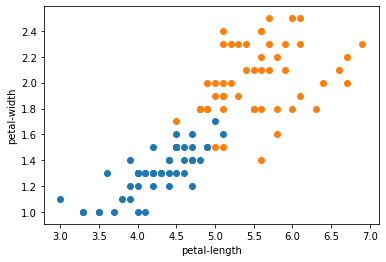

In [6]:
# Hier wird der Iris-Datensatz geladen und vorbereitet (siehe letzte Übung)

# Datensatz laden
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
iris_data = pd.read_csv("iris.csv", names = names)

# Klassen auswählen (Bei Bedarf ändern)
iris_data = iris_data.loc[lambda x: x['class'] != 'Iris-setosa']

# Merkmale auswählen (Bei Bedarf ändern)
iris_features = ['petal-length', 'petal-width']
X = iris_data[iris_features]

# Pandas-Datenformat in reine Liste umwandeln
X = X.values

# Label vorbereiten
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
iris_data["class_code"] = lb_make.fit_transform(iris_data["class"])
y = iris_data.class_code
# Pandas-Datenformat in reine Liste umwandeln
y = y.values
# Die Signum-Funktion unseres Perzeptrons benötigt die Label -1, 1
y[y==0] = -1
        
# Trainings- und Testdatensplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=.2, random_state=np.random.seed(42)))

# Scatterplot der ausgewählten Merkmale und Klassen
fig, ax = plt.subplots()
ax.scatter(X[(y==-1),0] , X[(y==-1),1])
ax.scatter(X[(y==1),0] , X[(y==1),1])
ax.set(xlabel = iris_features[0], ylabel = iris_features[1])
plt.show()

In [7]:
# Perzeptron auf Iris-Datensatz trainieren und anwenden
# Dein Code kommt hierhin:

**Aufgabe 5:** Welchen Einfluss haben die Hyperparameter *Epoche* und *Lernrate* auf die Klassifizierung der Banknoten? Lassen sich die vorherigen Ergebnisse noch verbessern?

Antwort: